In [1]:
from UTILITY_quickstart import *

In [2]:
#Start from the golden lattice, but with the injector reconfigured to the standard for 2024-10-22_oneBunch
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_injectorOnly.yml")

In [3]:
csrTF = False
evalElement = "PENT"
#evalElement = "BEGPDC"


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
    scratchPath = "/tmp",
    randomizeFileNames = True
)



Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /tmp/beams/activeBeamFile_13494374647986781569.h5, and reinit to tao


## Starting point

BC11CBEG
0.0005625231348857552 331860905.4316346 1631187.017766706


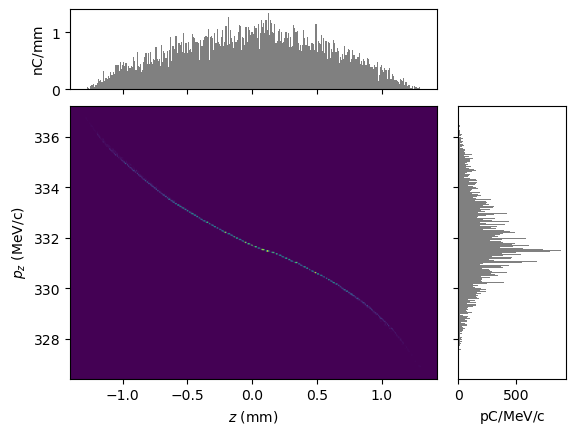

BC11CEND
0.0003438487799225761 331860905.551702 1631186.999791017


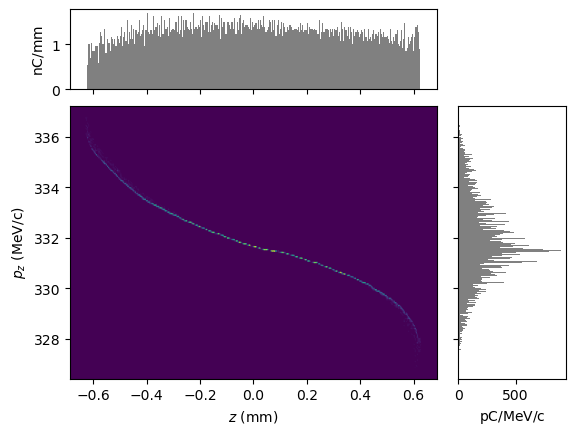

BEGBC14_1
0.00034336587541146607 4500365276.816084 52373404.45703727


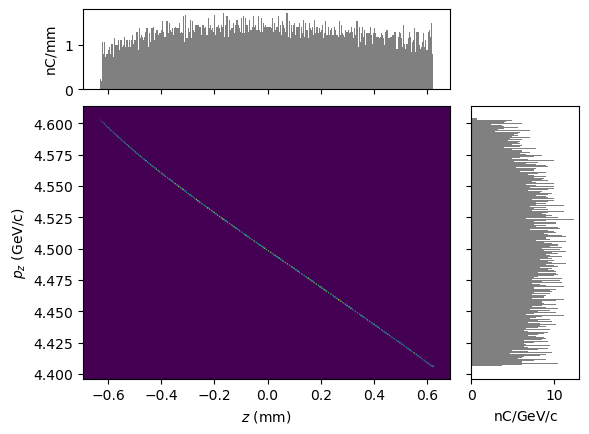

ENDBC14_2
7.479251278618444e-05 4500365309.537177 52373880.120278716


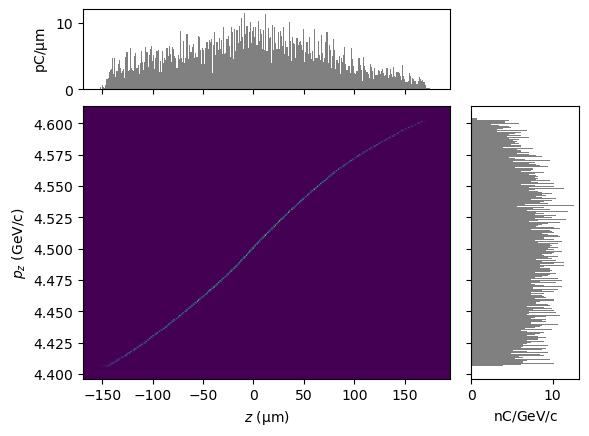

BEGBC20
7.47901968586577e-05 10003101900.326193 94835862.12190047


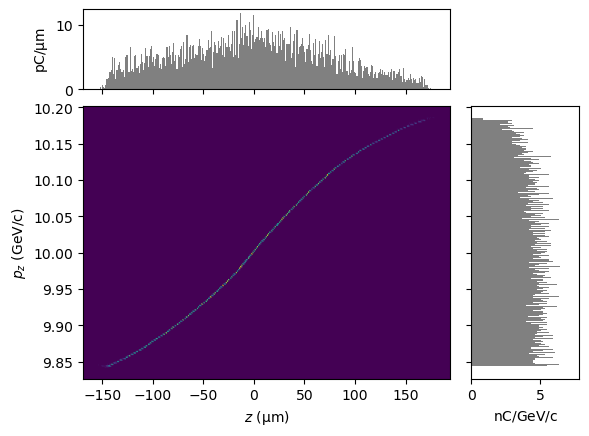

PENT
2.219638650551934e-05 10003103183.343248 94834972.99903834


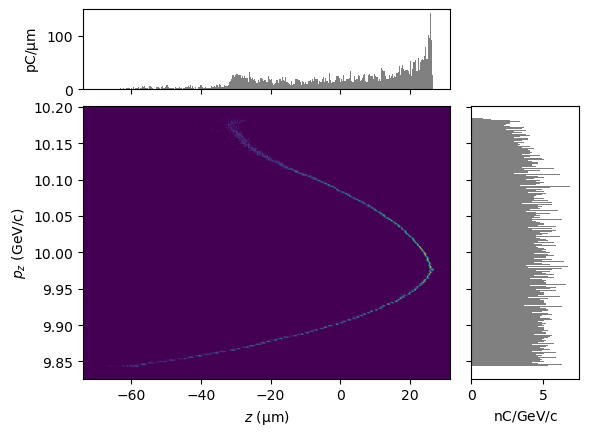

<Figure size 640x480 with 0 Axes>

In [4]:
importedDefaultSettings = (importedDefaultSettings | {"L1PhaseSet" : -22, "L2PhaseSet" : -39})

setLattice(tao, **importedDefaultSettings)
trackBeam(tao,  **importedDefaultSettings)

for ele in [ "BC11CBEG", "BC11CEND", "BEGBC14_1", "ENDBC14_2", "BEGBC20", "PENT" ]: 
    print(ele)
    P = getBeamAtElement(tao, ele)
    print( P["sigma_z"], P["mean_energy"], P["sigma_energy"] )
    display(plotMod(P, 'z', 'pz', bins=300 ))



plt.clf()


## Tune up with flags off

In [5]:
#Start from the golden lattice, but with the injector reconfigured to the standard for 2024-10-22_oneBunch
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_injectorOnly.yml")

importedDefaultSettings = importedDefaultSettings | {
    "centerBC14" : False,
    "centerBC20" : False,
    "centerMFFF" : False,
    "assertBC14Energy" : False,
    "assertBC20Energy" : False,
}

In [6]:
csrTF = False
evalElement = "PENT"
#evalElement = "BEGPDC"


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /tmp/beams/activeBeamFile_8934425016106035711.h5, and reinit to tao


BC11CBEG
0.0005633393489747493 331852682.8425624 1620279.781700573


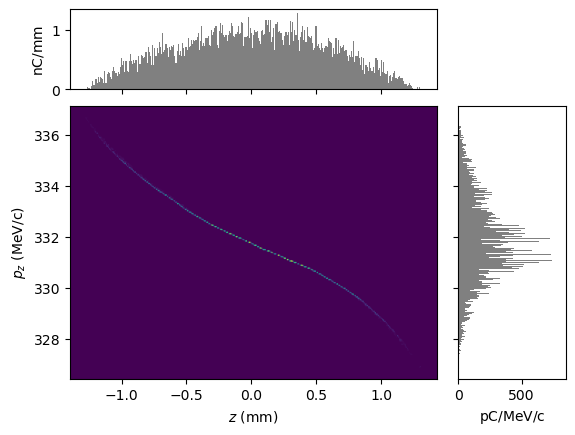

BEGBC14_1
0.0003454833898515721 4495129308.243427 52199852.579112545


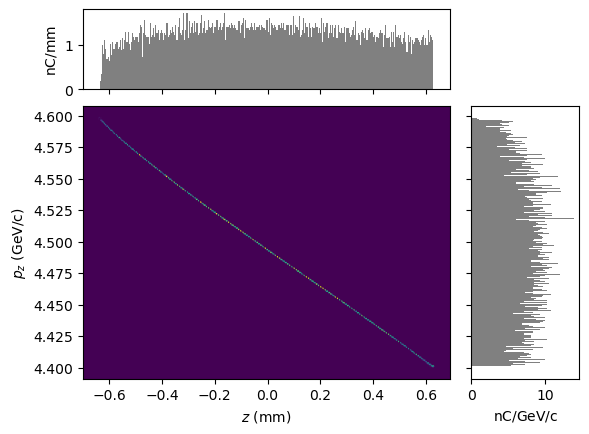

BEGBC20
8.79341082730887e-05 9992015464.967707 94675416.41498663


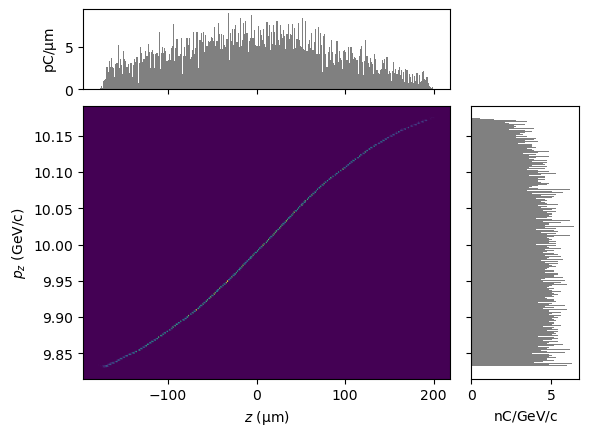

PENT
8.137794963909538e-05 9992014651.280619 94675095.24522546


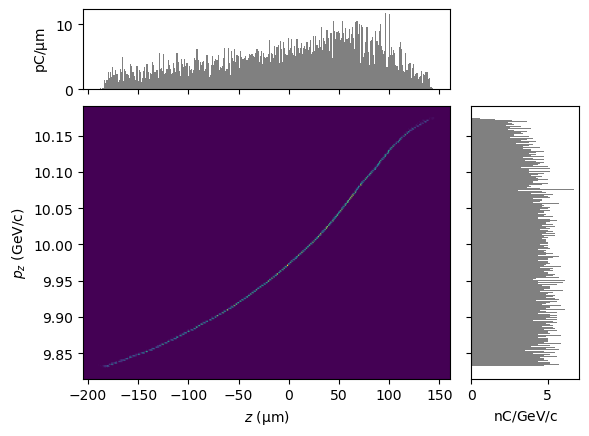

In [7]:
importedDefaultSettings = (importedDefaultSettings | {
    "L1PhaseSet" : -21.9, 
    "L1EnergyOffset": 0e6, 
    "L2PhaseSet" : -38.6,
    "L2EnergyOffset": 81e6, 
    "L3PhaseSet" : 2,
    "L3EnergyOffset": 80e6,
})

setLattice(tao, **importedDefaultSettings)
trackBeam(tao,  **importedDefaultSettings)

#for ele in [ "BC11CBEG", "BC11CEND", "BEGBC14_1", "ENDBC14_2", "BEGBC20", "PENT" ]: 
for ele in [ "BC11CBEG", "BEGBC14_1", "BEGBC20", "PENT" ]: 
    print(ele)
    P = getBeamAtElement(tao, ele)
    print( P["sigma_z"], P["mean_energy"], P["sigma_energy"] )
    display(plotMod(P, 'z', 'pz', bins=300 ))



plt.clf()